In [0]:
!pip install easycolab
import easycolab as ec
ec.mount()

  Created wheel for easycolab: filename=easycolab-0.1b29-cp36-none-any.whl size=4472 sha256=3669e2b1e21a0f8892cbc305d207eeb88ccb30d32060f956cf932cfe1ab29ecc
  Stored in directory: /root/.cache/pip/wheels/1b/c3/03/9d9371c4d3a117eff9caf88148e2f18ddf556543b4475055f1
Successfully built easycolab
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Opening directory /content/gdrive/My Drive/
Done!


In [0]:
import torch
from torch import nn
import torch.utils.data as torch_data
from torchvision import transforms
from torchvision import models
import torchvision
from tqdm import tqdm
import numpy as np
import os
import random
import PIL
import matplotlib.pyplot as plt

In [0]:
class create_set(torch_data.Dataset):
    def __init__(self, path_X, path_y,transform=None):
        super(create_set, self).__init__()
        #self.X=[str(i+1)+'.png' for i in range(len(os.listdir(path_X)))][6:]
        #self.y=[str(i+1)+'.png' for i in range(len(os.listdir(path_y)))][6:]
        
        self.X=sorted(os.listdir(path_X))#[6:]
        self.y=sorted(os.listdir(path_y))#[6:]
        self.transform=transform
        self.path_X=path_X
        self.path_y=path_y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        X=PIL.Image.open(os.path.join(self.path_X,self.X[idx])).crop((0, 138, 768, 906.0)).resize((256,256)) 
        y=PIL.Image.open(os.path.join(self.path_y,self.y[idx])).crop((0, 138, 768, 906.0)).resize((256,256)) 
        if self.transform is not None:
            rand=np.random.randint(10**9)
            random.seed(rand)
            X=self.transform(X)
            random.seed(rand)
            y=self.transform(y)
        return X, y

In [0]:
train_set=create_set('./bia_proj/data/trainX/', './bia_proj/data/trainY/', transform=transforms.Compose([
        transforms.ToTensor()
        ]))

In [0]:
class create_set(torch_data.Dataset):
    def __init__(self, path_X, path_y,transform=None):
        super(create_set, self).__init__()
        #self.X=[str(i+1)+'.png' for i in range(len(os.listdir(path_X)))][5:6]
        #self.y=[str(i+1)+'.png' for i in range(len(os.listdir(path_y)))][5:6]        
        self.X=sorted(os.listdir(path_X))
        self.y=sorted(os.listdir(path_y))
        self.transform=transform
        self.path_X=path_X
        self.path_y=path_y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        X=PIL.Image.open(os.path.join(self.path_X,self.X[idx]))
        #if X.size[1]>256:
        #  X=X.crop((0, 138, 768, 906.0)).resize((256,256))
        y=PIL.Image.open(os.path.join(self.path_y,self.y[idx]))
        #if y.size[1]>256:
        #  y=y.crop((0, 138, 768, 906.0)).resize((256,256))
        if self.transform is not None:
            rand=np.random.randint(10**9)
            random.seed(rand)
            X=self.transform(X)
            random.seed(rand)
            y=self.transform(y)
        return X, y

In [0]:
test_set=create_set('./bia_proj/data/testX/', './bia_proj/data/testY/', 
                    transform=transforms.Compose([transforms.ToTensor()]))

In [0]:
train_loader = torch_data.DataLoader(train_set, batch_size=10, shuffle=True) 


In [0]:
test_loader = torch_data.DataLoader(test_set, batch_size=1, shuffle=False)

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [0]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.conv2d11=nn.Conv2d(3, 64, 3, padding=1)
        self.conv2d12=nn.Conv2d(64, 64, 3, padding=1)
        self.bn11 = nn.BatchNorm2d(64)
        self.bn12 = nn.BatchNorm2d(64)

        self.conv2d21=nn.Conv2d(64, 128, 3, padding=1)
        self.conv2d22=nn.Conv2d(128, 128, 3, padding=1)
        self.bn21 = nn.BatchNorm2d(128)
        self.bn22 = nn.BatchNorm2d(128)

        self.conv2d31=nn.Conv2d(128, 256, 3, padding=1)
        self.conv2d32=nn.Conv2d(256, 256, 3, padding=1)
        self.bn31 = nn.BatchNorm2d(256)
        self.bn32 = nn.BatchNorm2d(256)

        self.conv2d41=nn.Conv2d(256, 512, 3, padding=1)
        self.conv2d42=nn.Conv2d(512, 512, 3, padding=1)
        self.bn41 = nn.BatchNorm2d(512)
        self.bn42 = nn.BatchNorm2d(512)

        self.conv2d51=nn.Conv2d(768, 256, 3, padding=1)
        self.conv2d52=nn.Conv2d(256, 256, 3, padding=1)
        self.bn51 = nn.BatchNorm2d(256)
        self.bn52 = nn.BatchNorm2d(256)

        self.conv2d61=nn.Conv2d(384, 128, 3, padding=1)
        self.conv2d62=nn.Conv2d(128, 128, 3, padding=1)
        self.bn61 = nn.BatchNorm2d(128)
        self.bn62 = nn.BatchNorm2d(128)

        self.conv2d71=nn.Conv2d(192, 64, 3, padding=1)
        self.conv2d72=nn.Conv2d(64, 64, 3, padding=1)
        self.bn71 = nn.BatchNorm2d(64)
        self.bn72 = nn.BatchNorm2d(64)

        self.conv2d8=nn.Conv2d(64, 3, 1)
        
        self.relu=nn.ReLU(inplace=True)
        self.dropout_25=nn.Dropout(0.25)
        self.dropout_50=nn.Dropout(0.5)
        self.maxpool2d=nn.MaxPool2d(2)
        self.upsample=nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        pretrained_net=models.vgg11_bn(pretrained=True)
        self.conv2d11=pretrained_net.features[0]
        self.conv2d21=pretrained_net.features[4]
        self.conv2d31=pretrained_net.features[8]
        self.conv2d32=pretrained_net.features[11]
        self.conv2d41=pretrained_net.features[15]
        self.conv2d42=pretrained_net.features[18]
        
        self.bn11=pretrained_net.features[1]
        self.bn21=pretrained_net.features[5]
        self.bn31=pretrained_net.features[9]
        self.bn32=pretrained_net.features[12]
        self.bn41=pretrained_net.features[16]
        self.bn42=pretrained_net.features[19]
        
        
        
        


    def forward(self, x):
        conv1=self.relu(self.bn12(self.conv2d12(self.relu(self.bn11(self.conv2d11(x))))))
        x=self.maxpool2d(conv1)
#        x=self.dropout_25(x)

        conv2=self.relu(self.bn22(self.conv2d22(self.relu(self.bn21(self.conv2d21(x))))))
        x=self.maxpool2d(conv2)
 #       x=self.dropout_25(x)

        conv3=self.relu(self.bn32(self.conv2d32(self.relu(self.bn31(self.conv2d31(x))))))
        x=self.maxpool2d(conv3)
  #      x=self.dropout_25(x)

        x=self.relu(self.bn42(self.conv2d42(self.relu(self.bn41(self.conv2d41(x))))))
        x=self.upsample(x)

        x=torch.cat([x, conv3], dim=1)
   #     x=self.dropout_25(x)
        x=self.relu(self.bn52(self.conv2d52(self.relu(self.bn51(self.conv2d51(x))))))
        x=self.upsample(x)        
        x = torch.cat([x, conv2], dim=1)       
   #     x=self.dropout_25(x)
        x=self.relu(self.bn62(self.conv2d62(self.relu(self.bn61(self.conv2d61(x))))))
        x = self.upsample(x)        
        x = torch.cat([x, conv1], dim=1)   
    #    x=self.dropout_25(x)
        x=self.relu(self.bn72(self.conv2d72(self.relu(self.bn71(self.conv2d71(x))))))
        
        x=self.conv2d8(x)

        return x

In [0]:
def train(epochs, net, criterion, optimizer, train_loader, test_loader,scheduler=None, verbose=True, save_dir=None):
    net.to(device)
    loss_train=[]
    loss_test=[]
    loss_min=100
    for epoch in tqdm(range(1, epochs+1)):
        net.train(True)
        for X, y in train_loader:
            X=X.to(device)
            y=y.to(device)
            model_output=net(X)
            loss=criterion(model_output, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_train.append(loss)
        net.train(False)
        net.eval()
        clear_output(True)
        with torch.no_grad():
          z1=test_set[0][0]
          z1=z1.to('cuda:0').unsqueeze(0)
          y1=test_set[0][1].to('cuda:0').unsqueeze(0)
          img1=net(z1)
          img1=torch.clamp(img1, min=0, max=1)
          z2=test_set[3][0]
          z2=z2.to('cuda:0').unsqueeze(0)
          img2=net(z2)
          img2=torch.clamp(img2, min=0, max=1)
          test_loss=criterion(img1, y1)
          loss_test.append(test_loss)
          plt.figure(figsize=(15,5))
          plt.subplot(1,3,1)
          plt.ylabel('Loss')
          plt.xlabel('epoch')
          plt.plot(loss_train, label='loss_train: {:.4f}'.format(loss_train[-1]))
          plt.plot(loss_test, label='loss_test: {:.4f}'.format(loss_train[-1]))
          plt.legend()
          plt.subplot(1,3,2)
          plt.title("Deblurred")
          plt.imshow(img1.cpu().detach().numpy().transpose([0, 2, 3, 1])[0])    
          plt.subplot(1,3,3)
          plt.title("Deblurred")
          plt.imshow(img2.cpu().detach().numpy().transpose([0, 2, 3, 1])[0])    
          plt.show()    
        if loss_min>loss:
            loss_min=loss
            torch.save(net.state_dict(), './bia_proj/unet/net.pth')

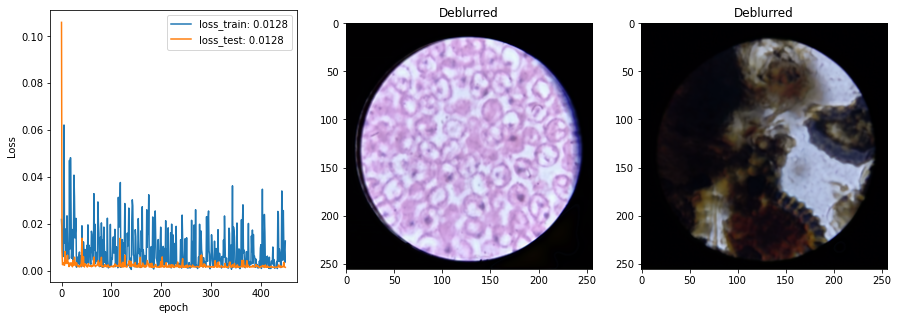

100%|██████████| 450/450 [1:22:02<00:00, 10.94s/it]


In [0]:
from IPython.display import clear_output
device='cuda:0'
net = UNet()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(net.parameters(), lr=0.001)
epochs = 450
train(epochs, net, criterion, optimizer, train_loader, test_loader)

In [0]:
net=UNet().to('cuda:0')
net.load_state_dict(torch.load('./bia_proj/unet/net.pth'))
net.eval()

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/checkpoints/vgg11_bn-6002323d.pth


UNet(
  (conv2d11): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2d21): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d22): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn21): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn22): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2d31): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d32): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn31): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn32): BatchNorm2d(256, eps=1e-05, momentum=0.1, aff